# Setup do Projeto

## Importando Bibliotecas

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Importando o Dataset

In [3]:
df = pd.read_csv("nike_data.csv")
df.head()

,index,url,name,sub_title,brand,model,color,price,currency,availability,description,raw_description,avg_rating,review_count,images,available_sizes,uniq_id,scraped_at
0,0,https://www.nike.com/t/dri-fit-team-minnesota-...,Nike Dri-FIT Team (MLB Minnesota Twins),Men's Long-Sleeve T-Shirt,Nike,14226571,Navy,40.00,USD,InStock,SWEAT-WICKING COMFORT.The Nike Dri-FIT Team (M...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,S | M | L | XL | 2XL,c3229e54-aa58-5fdd-9f71-fbe66366b2b2,20/09/2022 23:32:28
1,1,https://www.nike.com/t/club-américa-womens-dri...,Club América,Women's Nike Dri-FIT Soccer Jersey Dress,Nike,13814665,Black/Black,90.00,USD,InStock,"Inspired by traditional soccer jerseys, the Cl...","<div class=""pi-pdpmainbody""><br/><p>Inspired b...",5.0,1.0,https://static.nike.com/a/images/t_PDP_1280_v1...,L (12–14),f8ebb2ed-17ae-5719-b750-5ea3ec69b75c,20/09/2022 23:32:40
2,2,https://www.nike.com/t/sportswear-swoosh-mens-...,Nike Sportswear Swoosh,Men's Overalls,Nike,13015648,Black/White,140.00,USD,OutOfStock,WORKING HARD TO KEEP YOU COMFORTABLE.The Nike ...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",4.9,11.0,https://static.nike.com/a/images/t_PDP_1280_v1...,NaN,88120081-e6cb-5399-b9dc-a2d3d5dd5206,20/09/2022 23:33:16
3,3,https://www.nike.com/t/dri-fit-one-luxe-big-ki...,Nike Dri-FIT One Luxe,Big Kids' (Girls') Printed Tights (Extended Size),Nike,13809796,Black/Rush Pink,22.97,USD,OutOfStock,ELEVATED COMFORT GOES FULL BLOOM.The Nike Dri-...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,NaN,98348cc5-1520-5b6e-a5f6-c42547b6a092,20/09/2022 23:33:17
4,4,https://www.nike.com/t/paris-saint-germain-rep...,Paris Saint-Germain Repel Academy AWF,Big Kids' Soccer Jacket,Nike,13327415,Dark Grey/Black/Siren Red/Siren Red,70.00,USD,InStock,WATER-REPELLENT COVERAGE GETS PSG DETAILS.The ...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,XS | S | M | L | XL,f15981a5-d8c9-53fa-880d-80606be188fe,20/09/2022 23:33:22


# Análise Exploratória Rapida

In [4]:
stats.describe(df.price)

DescribeResult(nobs=112, minmax=(9.97, 175.0), mean=61.50625000000001, variance=1591.0316614864864, skewness=0.9575290891510537, kurtosis=0.08078355404257653)

In [5]:
 df.describe()

,index,model,price,avg_rating,review_count
count,112.000000,1.120000e+02,112.000000,23.000000,23.000000
mean,55.500000,9.298439e+07,61.506250,4.773913,31.391304
std,32.475632,2.698557e+08,39.887738,0.336043,72.942530
min,0.000000,1.013351e+07,9.970000,3.800000,1.000000
25%,27.750000,1.329489e+07,31.720000,4.750000,1.000000
50%,55.500000,1.389103e+07,45.000000,4.800000,5.000000
75%,83.250000,1.406539e+07,85.242500,5.000000,13.000000
max,111.000000,1.007648e+09,175.000000,5.000000,316.000000


#### Verificando quantidade de linhas / colunas

In [6]:
df.shape

(112, 18)

#### Verificando Nulos

In [7]:
df.isnull().sum()

index               0
url                 0
name                0
sub_title           0
brand               0
model               0
color               2
price               0
currency            0
availability        4
description         0
raw_description     0
avg_rating         89
review_count       89
images              4
available_sizes    56
uniq_id             0
scraped_at          0
dtype: int64

### Valor / Preço

#### Média de Preço

In [8]:
np.mean(df.price)

61.50625000000001

#### Desvio Padrão de Preço

In [9]:
np.std(df.price)

39.70926871212546

#### Mediana de Preço

In [10]:
np.median(df.price)

45.0

#### Preço Mínimo e Maximo

In [11]:
np.max(df.price)

175.0

In [12]:
np.min(df.price)

9.97

### Notas

#### Verificando nulos

In [13]:
df.avg_rating.isnull().sum()

89

#### Removendo linhas que tenham NaN no campo `avg_rating`

In [14]:
df_ratings = df[pd.notnull(df['avg_rating'])]
df_ratings.avg_rating.isnull().sum()

0

In [28]:
df_ratings.shape

(23, 18)

#### Média dos Votos

In [15]:
np.mean(df_ratings.avg_rating)

4.77391304347826

#### Desvio Padrão dos Votos

In [16]:
np.std(df_ratings.avg_rating)

0.3286565424167698

#### Mediana de Preço

In [17]:
np.median(df_ratings.avg_rating)

4.8

#### Nota Mínima / Máxima

In [18]:
stats.describe(df_ratings.avg_rating)

DescribeResult(nobs=23, minmax=(3.8, 5.0), mean=4.77391304347826, variance=0.1129249011857708, skewness=-1.9365216754790713, kurtosis=2.812822413959327)

# Distribuição T-Student

> Qual a probabilidade de um produto ser avaliado com nota menor que 4?

Característica da distribuição T-Student a amostra ter 30 ou menos observações

In [45]:
amostra = df_ratings.sample(20)
amostra.shape

(20, 18)

#### Recuperando o Teste T

In [46]:
media_populacao = np.mean(df_ratings.avg_rating)
media_amostra = np.mean(amostra.avg_rating)

t_stat = media_populacao / media_amostra

t_stat

0.9976829766934713

#### Probabilidade de uma ser menor que 4

In [47]:
stats.t.cdf(t_stat, 4) * 100

81.25515623786835

#### Probabilidade uma nota ser maior que 3

In [51]:
stats.t.sf(t_stat, 3) * 100

19.598070537867052

# Distribuição de Poisson

> Média de acidentes numa fábrica é 2 por dia

In [65]:
media = 2

#### Qual a probabilidade de acontecerem 3 acidentes no dia?

In [68]:
stats.poisson.pmf(3, media)

0.18044704431548356

#### Qual a probabilidade de ocorrerem 3 acidentes ou menos no dia?

In [70]:
stats.poisson.cdf(3, media)

0.857123460498547

#### Qual a probabilidade de correrem 3 acidentes ou mais no dia?

In [69]:
stats.poisson.sf(3, media)

0.14287653950145296

# Distribuição Binomial

## Teste da Moeda. Cara ou Coroa. 

Precisamos ter a ideia de: 

* Quantidade de eventos positivos esperados do teste
* Quantidade de Experimentos que serão executados
* Probabilidade; Como a moeda, tem apenas 2 opções, podemos fazer 1/2 = 0,5


> Jogando uma moeda 5 vezes, qual a probabilidade de dar cara 3 vezes?

In [72]:
qtd_eventos_esperados = 3
qtd_de_experimentos = 5
probabilidade = 0.5

In [73]:
stats.binom.pmf(qtd_eventos_esperados, qtd_de_experimentos, probabilidade)

0.31249999999999983

# Testes de Normalidade

## Histograma

### Esperamos um formato de sino. Ou seja, uma maior concentracão de dados em torno da média 

Text(0.5, 1.0, 'Distribuição das Avaliações')

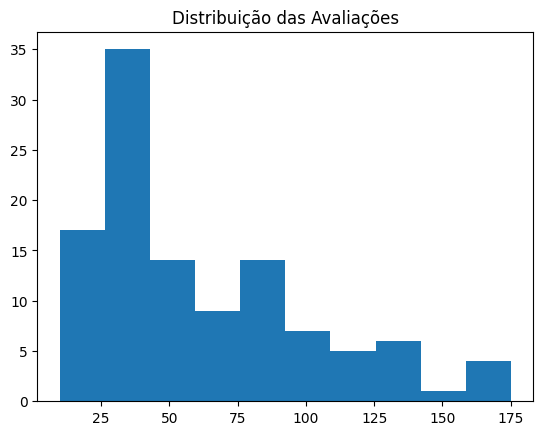

In [85]:
plt.hist(df.price)
plt.title("Distribuição dos Preços")

Dados não normais

### Probplot - Espera-se encontrar os pontos de disperção proximo aos eixos 

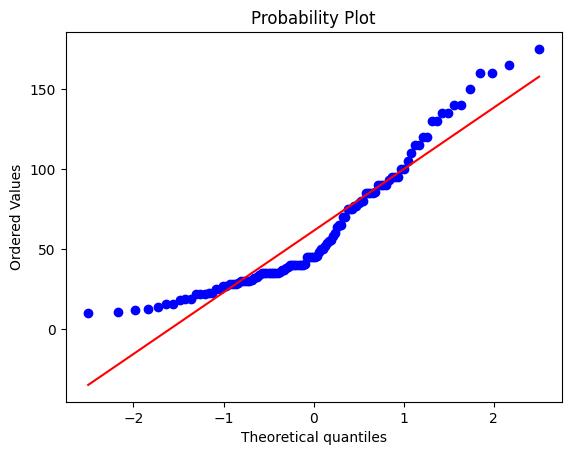

In [88]:
fig, ax = plt.subplots()
stats.probplot(df.price, fit=True, plot=ax)
plt.show()

Dados não normais

## Teste de Hipótese